In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import Normalizer

In [ ]:
%cd /content/drive/MyDrive/code

/content/drive/MyDrive/code


In [ ]:
def convert2id(temp,N):
  out_array = np.eye(N,1);
  k1 = list(set(temp))
  M = len(k1)
  # print(k1)
  for n in range(0,M):
    for m in range(0,N):
      if(temp[m]==k1[n]):
        out_array[m]=n
  return out_array

def convertProtoid(temp,N):
  out_array = np.eye(N,1);
  k1 = ['rdp', 'ipv6-route', '3pc', 'gmtp', 'micp', 'l2tp', 'ippc', 'udp', 'skip', 'iso-ip', 'cbt', 'aes-sp3-d', 'i-nlsp', 'cftp', 'gre', 'pup', 'srp', 'wsn', 'etherip', 'idpr', 'dcn', 'visa', 'crudp', 'nvp', 'il', 'cpnx', 'ipv6-opts', 'ddp', 'ipv6-frag', 'merit-inp', 'ifmp', 'scps', 'rvd', 'vrrp', 'chaos', 'hmp', 'mhrp', 'smp', 'xnet', 'tp++', 'pnni', 'sep', 'iso-tp4', 'sccopmce', 'rtp', 'sun-nd', 'pipe', 'ipnip', 'idrp', 'trunk-2', 'iatp', 'unas', 'mux', 'compaq-peer', 'igp', 'sat-expak', 'iplt', 'ipx-n-ip', 'ipv6-no', 'encap', 'wb-mon', 'idpr-cmtp', 'dgp', 'bna', 'ipcv', 'ax.25', 'wb-expak', 'ttp', 'ddx', 'netblt', 'leaf-2', 'br-sat-mon', 'prm', 'irtp', 'larp', 'rsvp', 'sm', 'ipcomp', 'vines', 'xns-idp', 'pim', 'bbn-rcc', 'cphb', 'uti', 'ospf', 'fc', 'secure-vmtp', 'ipip', 'qnx', 'mfe-nsp', 'any', 'trunk-1', 'igmp', 'kryptolan', 'sctp', 'sdrp', 'arp', 'nsfnet-igp', 'tcp', 'pvp', 'emcon', 'ipv6', 'xtp', 'tlsp', 'fire', 'ptp', 'eigrp', 'pri-enc', 'mobile', 'isis', 'tcf', 'argus', 'narp', 'st2', 'zero', 'sat-mon', 'vmtp', 'sprite-rpc', 'stp', 'a/n', 'egp', 'mtp', 'pgm', 'aris', 'ip', 'sps', 'icmp', 'ggp', 'crtp', 'snp', 'swipe', 'ib', 'leaf-1']
  M = len(k1)
  # print(k1)
  for n in range(0,M):
    for m in range(0,N):
      if(temp[m]==k1[n]):
        out_array[m]=n
  return out_array

def convertServiceid(temp,N):
  out_array = np.eye(N,1);
  k1 = ['http', 'ssh', '-', 'snmp', 'ftp', 'dhcp', 'pop3', 'radius', 'ftp-data', 'irc', 'ssl', 'smtp', 'dns']
  M = len(k1)
  # print(k1)
  for n in range(0,M):
    for m in range(0,N):
      if(temp[m]==k1[n]):
        out_array[m]=n
  return out_array

def convertStateid(temp,N):
  out_array = np.eye(N,1);
  k1 = ['PAR', 'no', 'ECO', 'REQ', 'CON', 'RST', 'URN', 'FIN', 'INT']
  M = len(k1)
  # print(k1)
  for n in range(0,M):
    for m in range(0,N):
      if(temp[m]==k1[n]):
        out_array[m]=n
  return out_array

def convertTargetid(temp,N):
  out_array = np.eye(N,1);
  k1 = ['Backdoor', 'Exploits', 'Reconnaissance', 'Fuzzers', 'Analysis', 'DoS', 'Generic', 'Worms', 'Shellcode', 'Normal']
  M = len(k1)
  # print(k1)
  for n in range(0,M):
    for m in range(0,N):
      if(temp[m]==k1[n]):
        out_array[m]=n
  return out_array

def plot_results(H):
  results = pd.DataFrame({"Train Loss": H.history['loss'],
                          "Train Accuracy": H.history['accuracy']
                          })
  fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
  results[["Train Loss"]].plot(ax=ax[0])
  results[["Train Accuracy"]].plot(ax=ax[1])
  ax[0].set_xlabel("Epoch")
  ax[1].set_xlabel("Epoch")
  plt.show()

(25000, 41)


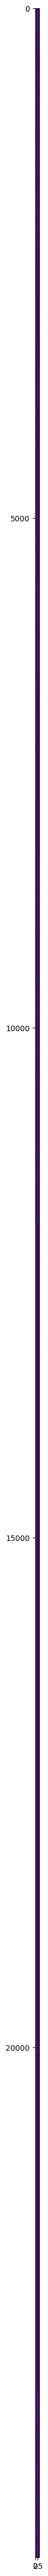

[[6.09878970e-14 3.88104799e-08 1.10887085e-08 ... 0.00000000e+00
  5.54435427e-09 0.00000000e+00]
 [9.08059015e-15 7.94551638e-09 2.27014754e-09 ... 0.00000000e+00
  1.13507377e-09 0.00000000e+00]
 [5.85205976e-15 8.19288367e-09 2.34082391e-09 ... 0.00000000e+00
  1.17041195e-09 0.00000000e+00]
 ...
 [5.81000871e-11 2.54528768e-08 2.07778586e-09 ... 0.00000000e+00
  7.79169698e-10 0.00000000e+00]
 [1.34279371e-09 8.45283811e-06 1.44905796e-05 ... 0.00000000e+00
  2.41509660e-06 0.00000000e+00]
 [6.28340268e-08 4.75923378e-06 0.00000000e+00 ... 4.85636100e-08
  1.45690830e-07 0.00000000e+00]]


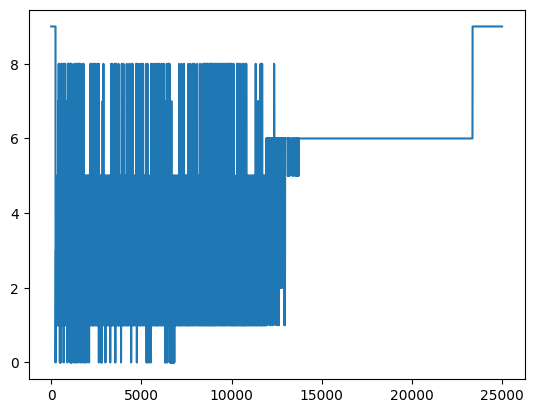

In [ ]:
loc = "UNSW_NB15_training-set.csv"
N = 25000
NF = 41
all_feat = np.zeros((N,NF))
target = np.zeros(N)
temp = np.zeros(N)

data = pd.read_csv(loc)
# print(data)
ids = data.columns
# print(ids)
dur_feature_array = data[ids[1]]
all_feat[:,0] = dur_feature_array[0:N]
d = data[ids[2]];temp = d[0:N]
# print(d)
proto_feature_array = convertProtoid(temp,N)

for n in range(0,N):
  all_feat[n,1] = proto_feature_array[n]

d = data[ids[3]]
temp = d[0:N]
service_feature_array = convertServiceid(temp,N)
for n in range(0,N):
  all_feat[n,2] = service_feature_array[n]

d = data[ids[4]]
temp = d[0:N]
state_feature_array = convertStateid(temp,N)
for n in range(0,N):
  all_feat[n,3] = state_feature_array[n]

for m in range(5,NF,1):
  d = data[ids[m]]
  all_feat[0:N,m-1] = d[0:N]

#================Target===================#
d = data[ids[43]]
temp = d[0:N]
target_array = convertTargetid(temp,N)
for n in range(0,N):
  target[n] = target_array[n]


transformer = Normalizer().fit(all_feat)
trn_data = transformer.transform(all_feat)

print(all_feat.shape)

# plt.figure(figsize=(10,60))
# plt.imshow(all_feat)
# plt.show()

plt.figure(figsize=(10,60))
plt.imshow(trn_data)
plt.show()

print(trn_data)

plt.plot(target)
plt.show()

target = tf.keras.utils.to_categorical(target, num_classes = 10)

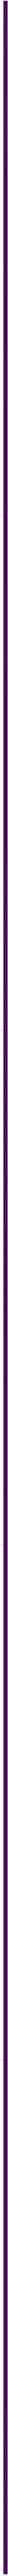

In [ ]:
plt.figure(figsize=(10,600))
plt.imshow(trn_data)
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 41, 64)            1600000   
                                                                 
 spatial_dropout1d (Spatial  (None, 41, 64)            0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 1633674 (6.23 MB)
Trainable params: 1633674 (6.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
625/625 [==============================] - 59s 87ms/step - loss: 1.5476 - accur

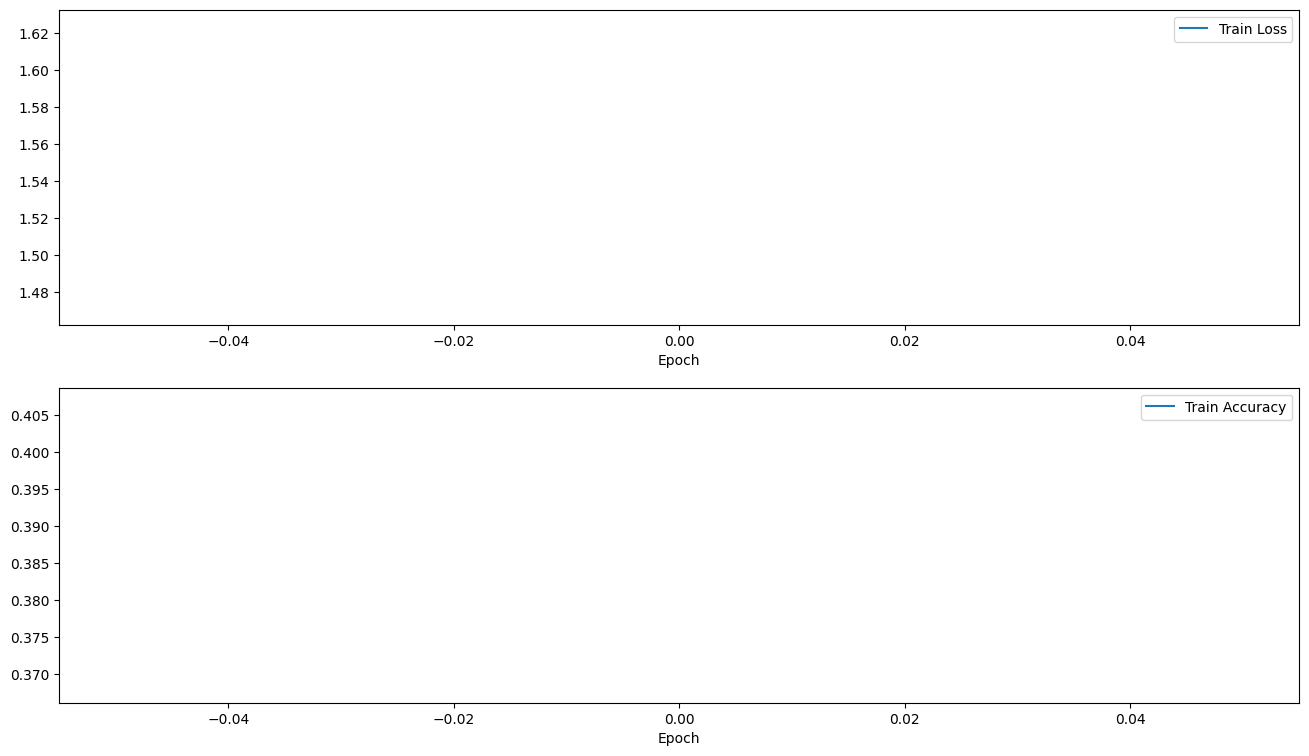

In [ ]:
#==========================CNN Model=========================#
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout1D, LSTM, Embedding, Dropout
import pickle

model = Sequential()
model.add(Embedding(25000, 64, input_length = 41))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

epochs = 1
batch_size = 32

H = model.fit(trn_data, target, epochs=epochs, batch_size=batch_size,validation_split=0.2)
plot_results(H)

model.save_weights("LSTM_model.h5")

In [ ]:
!pip install flask-ngrok
!pip install pyngrok==4.1.1
!ngrok authtoken 2aj8IWB8fBsMyTN88R0R6F0ECE7_86ADCCAAXeDFEcDqNcp1c

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=93835b07f5b4a9706ad4a5074f8789644f6a9527343b46974dba302666cd6d1c
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout1D, LSTM, Embedding

app = Flask(__name__)
run_with_ngrok(app)

model = Sequential()
model.add(Embedding(25000, 128, input_length = 41))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.load_weights('LSTM_model.h5')

@app.route('/')
def main():
    return render_template("main_code.html")


@app.route('/test', methods=['GET','POST'])
def test():
    y_test = np.zeros((1,41))
    x_array = np.arange(0,41)
    if request.method == "POST":
        new_freq = request.values.get('new_freq')
        val = new_freq.split(" ")
        for m in range(0,41):
            y_test[0,m] = val[m]
        # app.logger.warning(y_test)
    plt.bar(x_array, y_test.ravel())
    plt.savefig("static/plot_feature.jpg")
    # plt.show()

    y_pred = model.predict(y_test)
    y_pred = np.argmax(y_pred,axis=1)
    app.logger.warning(y_pred)

    if(y_pred == 0): result = 'Backdoor'
    elif(y_pred == 1): result = 'Exploits' #exploits the data
    elif(y_pred == 2):result = 'Reconnaissance'
    elif(y_pred == 3):result = 'Fuzzers' #fuzzer attack
    elif(y_pred == 4):result = 'Analysis' #analyse the data
    elif(y_pred == 5):result = 'DoS'
    elif(y_pred == 6):result = 'Generic'
    elif(y_pred == 7):result = 'Worms'
    elif(y_pred == 8):result = 'Shellcode'
    else:result = 'Normal'

    return result


if __name__ == "__main__":
    # PlayText("Welcome to Email System")
    app.run()

ModuleNotFoundError: No module named 'flask_ngrok'